# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

# Pandas Advanced 

> - [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
> - [Pandas 10분 완성](https://dataitgirls2.github.io/10minutes2pandas/)

### INDEX

> - Plotting (그래프)
> - Getting Data In / Out (데이터 입 / 출력)
> - Gotchas (잡았다!)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 11. Plotting (그래프)

> - 데이터프레임에서 plot() 메소드는 라벨이 존재하는 모든 열을 그릴 때 편리합니다.

In [4]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2022', periods=1000))
ts

2022-01-01   -1.354260
2022-01-02    1.450519
2022-01-03    0.373974
2022-01-04    0.357553
2022-01-05   -0.906410
                ...   
2024-09-22   -1.308422
2024-09-23   -1.611178
2024-09-24   -1.352880
2024-09-25    0.356234
2024-09-26    0.144018
Freq: D, Length: 1000, dtype: float64

In [5]:
ts = ts.cumsum()
ts

2022-01-01    -1.354260
2022-01-02     0.096258
2022-01-03     0.470232
2022-01-04     0.827785
2022-01-05    -0.078625
                ...    
2024-09-22   -14.933144
2024-09-23   -16.544322
2024-09-24   -17.897203
2024-09-25   -17.540968
2024-09-26   -17.396950
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

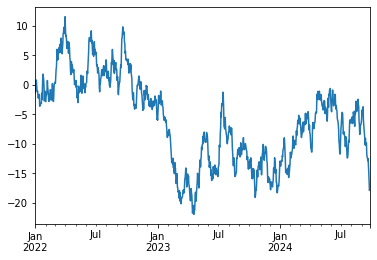

In [6]:
ts.plot()

In [7]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D']) 
df

A         B         C         D
2022-01-01  0.694220 -1.980351  0.691383  1.891865
2022-01-02 -1.263938  2.266121  0.040777 -0.864247
2022-01-03 -0.583425  0.216867  1.702510  0.104548
2022-01-04  0.715749  0.481989 -0.114402  0.786223
2022-01-05 -0.410203  1.901856  1.101116  0.810731
...              ...       ...       ...       ...
2024-09-22 -0.813966  0.813603 -0.090525  0.233254
2024-09-23 -2.150602  0.497878  1.010882  1.512455
2024-09-24 -0.710164  0.568303 -0.166746 -2.053826
2024-09-25  0.881555  0.532604  0.920328  0.167247
2024-09-26  1.464525 -0.352381 -0.461852 -0.810952

[1000 rows x 4 columns]

In [8]:
df = df.cumsum()
df

A          B          C          D
2022-01-01   0.694220  -1.980351   0.691383   1.891865
2022-01-02  -0.569718   0.285770   0.732159   1.027618
2022-01-03  -1.153142   0.502637   2.434670   1.132166
2022-01-04  -0.437393   0.984626   2.320268   1.918389
2022-01-05  -0.847597   2.886482   3.421384   2.729121
...               ...        ...        ...        ...
2024-09-22 -20.616371  11.474934  22.941491 -31.062358
2024-09-23 -22.766972  11.972813  23.952373 -29.549903
2024-09-24 -23.477137  12.541115  23.785626 -31.603729
2024-09-25 -22.595582  13.073719  24.705954 -31.436482
2024-09-26 -21.131058  12.721338  24.244102 -32.247434

[1000 rows x 4 columns]

<Figure size 432x288 with 0 Axes>

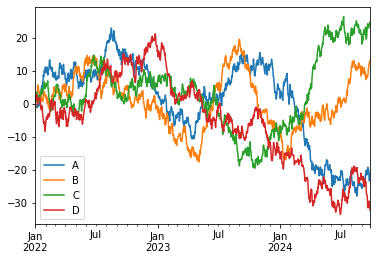

In [15]:
plt.figure()
df.plot()
plt.legend(loc='best')

## 12. Getting Data In / Out (데이터 입 / 출력)

> - 파일 저장
> - 파일 로딩

In [16]:
df

A          B          C          D
2022-01-01   0.694220  -1.980351   0.691383   1.891865
2022-01-02  -0.569718   0.285770   0.732159   1.027618
2022-01-03  -1.153142   0.502637   2.434670   1.132166
2022-01-04  -0.437393   0.984626   2.320268   1.918389
2022-01-05  -0.847597   2.886482   3.421384   2.729121
...               ...        ...        ...        ...
2024-09-22 -20.616371  11.474934  22.941491 -31.062358
2024-09-23 -22.766972  11.972813  23.952373 -29.549903
2024-09-24 -23.477137  12.541115  23.785626 -31.603729
2024-09-25 -22.595582  13.073719  24.705954 -31.436482
2024-09-26 -21.131058  12.721338  24.244102 -32.247434

[1000 rows x 4 columns]

- csv 파일

In [17]:
df.to_csv('data/foo.csv')

In [19]:
csv_df = pd.read_csv('data/foo.csv')

In [20]:
csv_df.head(10)

Unnamed: 0         A         B         C         D
0  2022-01-01  0.694220 -1.980351  0.691383  1.891865
1  2022-01-02 -0.569718  0.285770  0.732159  1.027618
2  2022-01-03 -1.153142  0.502637  2.434670  1.132166
3  2022-01-04 -0.437393  0.984626  2.320268  1.918389
4  2022-01-05 -0.847597  2.886482  3.421384  2.729121
5  2022-01-06 -1.200294  1.864555  2.112959  2.583930
6  2022-01-07 -0.270621  3.188766  0.618251  0.556129
7  2022-01-08 -0.223039  4.544296  1.364980 -0.210614
8  2022-01-09 -0.267929  5.680396  2.632636  1.559657
9  2022-01-10 -0.812544  5.301267  1.869811  1.675866

- HDF5 파일

In [21]:
df.to_hdf('data/foo.h5','df')

In [22]:
h5_df = pd.read_hdf('data/foo.h5','df')

In [23]:
h5_df.head()

Unnamed: 0         A         B         C         D
0  2022-01-01  0.694220 -1.980351  0.691383  1.891865
1  2022-01-02 -0.569718  0.285770  0.732159  1.027618
2  2022-01-03 -1.153142  0.502637  2.434670  1.132166
3  2022-01-04 -0.437393  0.984626  2.320268  1.918389
4  2022-01-05 -0.847597  2.886482  3.421384  2.729121

- Excel 파일

In [28]:
df.to_excel('data/foo.xlsx', sheet_name='Sheet1')

In [29]:
excel_df = pd.read_excel('data/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

In [27]:
excel_df.head()

Unnamed: 0.1  Unnamed: 0         A         B         C         D
0             0  2022-01-01  0.694220 -1.980351  0.691383  1.891865
1             1  2022-01-02 -0.569718  0.285770  0.732159  1.027618
2             2  2022-01-03 -1.153142  0.502637  2.434670  1.132166
3             3  2022-01-04 -0.437393  0.984626  2.320268  1.918389
4             4  2022-01-05 -0.847597  2.886482  3.421384  2.729121

## 13. Gotchas (잡았다!)

```python

# 연산 수행 시 다음과 같은 예외 상황을 볼 수도 있습니다.
if pd.Series([False, True, False]):
    print("I was true")
   
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Input In [30], in <cell line: 2>()
      1 # 연산 수행 시 다음과 같은 예외 상황을 볼 수도 있습니다.
----> 2 if pd.Series([False, True, False]):
      3     print("I was true")

File C:\Python\anaconda3\lib\site-packages\pandas\core\generic.py:1527, in NDFrame.__nonzero__(self)
   1525 @final
   1526 def __nonzero__(self):
-> 1527     raise ValueError(
   1528         f"The truth value of a {type(self).__name__} is ambiguous. "
   1529         "Use a.empty, a.bool(), a.item(), a.any() or a.all()."
   1530     )

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
    
   
```

In [32]:
# 이러한 경우에는 any(), all(), empty 등을 사용해서 무엇을 원하는지를 선택 (반영)해주어야 합니다.

if pd.Series([False, True, False])is not None:
      print("I was not None")

I was not None


<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>